In [201]:
import matplotlib.pyplot as plt
import numpy as np
from tueplots import bundles
from tueplots import figsizes

bundle = bundles.icml2024()
bundle["legend.fontsize"] = 8
bundle["font.size"] = 11
plt.rcParams.update(bundle)
plt.rcParams.update(figsizes.icml2024_half())

In [202]:
data = {
    '99': {
        'Sub-Gau': {
            'Normal': 100.0,
            'Laplace': 100.00,
            'Uniform': 100.00,
            'Skew normal': 99.6,
            'Student T': 100.00,
            'Registration Error': 99.8,
        },
        'Gau': {
            'Normal': 99.20,
            'Laplace': 97.00,
            'Uniform': 100.00,
            'Triangular': 99.8,
            'Student T': 97.4,
            'Registration Error': 98.5,
        },
    },
    '90': {
        'Sub-Gau': {
            'Normal': 99.3,
            'Laplace': 97.4,
            'Uniform': 100.00,
            'Triangular': 100.0,
            'Student T': 99.0,
            'Registration Error': 98.8,
        },
        'Gau': {
            'Normal': 90.0,
            'Laplace': 87.3,
            'Uniform': 96.8,
            'Skew normal': 91.0,
            'Student T': 89.3,
            'Registration Errors': 86.8,
        },
    },
}

In [203]:
# Labels for the x-axis
distributions = list(data["99"]["Sub-Gau"].keys())
methods = ["Sub-Gaussian", "Gaussian"]


# Function to create bar charts
def create_bar_chart(percentage, methods: dict, distributions: dict, min_y: float, legend: bool, ax):
    sub_gau_values = list(data[percentage]["Sub-Gau"].values())
    gau_values = list(data[percentage]["Gau"].values())

    x = np.arange(len(methods)) * 1.0  # the label locations
    num_dists = len(distributions)
    width = 0.12  # the width of the bars

    bars = []
    for i in range(num_dists):
        pos = x - width / 2 * (num_dists - 1) + i * width
        bar = ax.bar(
            pos, [sub_gau_values[i], gau_values[i]], width, label=distributions[i]
        )
        bars.append(bar)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    # ax.set_xlabel("Methods")
    ax.set_ylabel("Inlier ratios (\%)")
    ax.set_title(
        "Comparison of Bounds at "
        + percentage
        + "\% confidence level"
    )
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    if legend:
        ax.legend(loc="upper right", ncol=1, frameon=False, bbox_to_anchor=(1.5, 1.0))
    ax.set_ylim(min_y, 102)
    ax.set_xlim(-0.6, 1.6)
    ax.hlines(int(percentage[:2]), -0.5, 1.5, colors="r", linestyles="dashed")
    ax.grid(True, linewidth=0.5, c="gainsboro", axis="y")
    


/tmp/ipykernel_30687/1307141304.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=2.0)


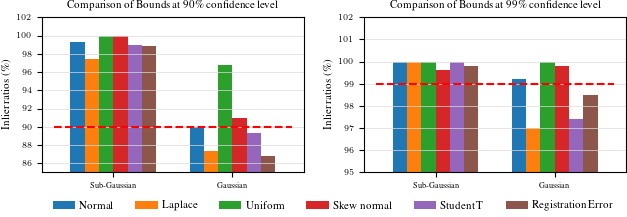

In [204]:
plt.rcParams.update(
        figsizes.icml2024_full(rel_width=1.0, height_to_width_ratio=0.7)
    )
fig, axes = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)
create_bar_chart('90', methods, distributions, 85, False, axes[0])
create_bar_chart('99', methods, distributions, 95, False, axes[1])
lines, labels = axes[0].get_legend_handles_labels()
fig.legend(
    lines,
    labels,
    loc="center",
    bbox_to_anchor=(0.51, 0.06),
    ncol=6,
    frameon=False,
    handletextpad=0.4,
)
fig.savefig("calibration.pdf")